In [204]:
import numpy as np
import pandas as pd
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['axes.titlepad'] = -25 
plt.rcParams["font.family"] = "Adobe Gothic Std"

In [205]:
def get_meridios_quality_history_csv(provider, csv):
    df = pd.read_csv(csv, 
                     usecols=["lastupdate", "metricname", "ptsseen_avg"], 
                     parse_dates=["lastupdate"])
    df['Provider'] = provider.replace("_", " ")
    # Normalize last update to just a date (not specific run time)
    df['lastupdate'] = df['lastupdate'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day))
    return df

dfs = []
files = glob.glob('./clinic/*.csv')

for file in files:
    clinic = file.replace('./clinic/',"")
    clinic = clinic[:-4]
    dfs.append(get_meridios_quality_history_csv(clinic,"./clinic/" + clinic +".csv"))
    
big_frame = pd.concat(dfs, ignore_index=True)
big_frame = big_frame.pivot_table(index='lastupdate', 
                                      columns=['metricname','Provider'], 
                                      values="ptsseen_avg")
big_frame.to_csv("./big_frame.csv")

In [224]:
colors = sns.hls_palette(10, l=.4, s=.8)

def quality_graphs_by_clinics(measure, measuretitle, startdate='2017-08-02', enddate='2018-2-28'):

    measure = big_frame[measure].loc[startdate:enddate]
    measure.drop('FCN', axis=1, inplace=True)

    fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(12, 7), sharey=True)
    fig.suptitle(measuretitle, fontsize=24)

    for i,var in enumerate(measure.columns):
        measure[var].plot(ax=axes[i], title=var, color=colors[i])
        x_axis = axes[i].axes.get_xaxis()
        x_axis.set_visible(False)
        axes[i].set_ylim([30, 100])
        axes[i].title.set_color(colors[i])
        axes[i].xaxis.label.set_color(colors[i])
        
    fig.savefig(measuretitle + ".png", dpi=96)

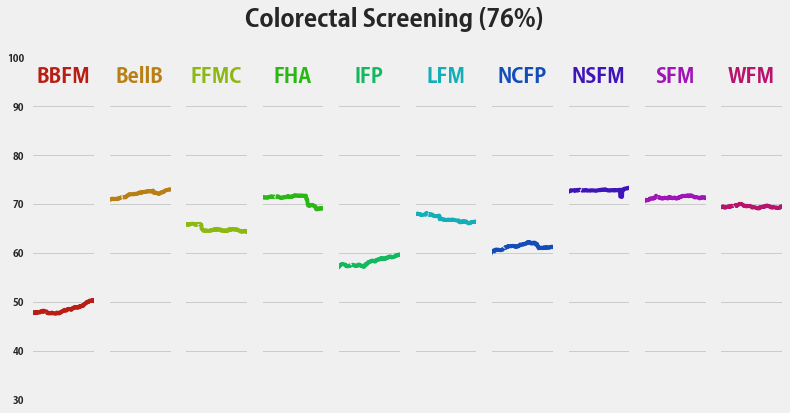

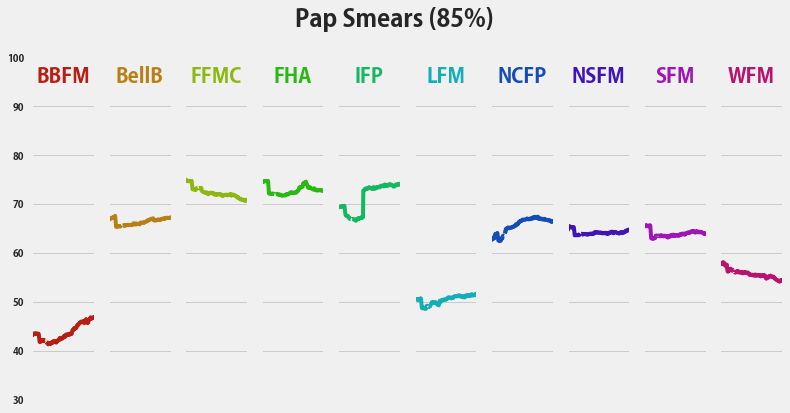

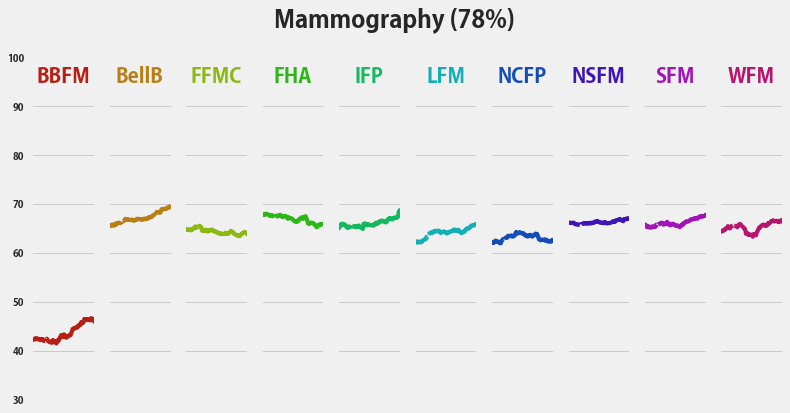

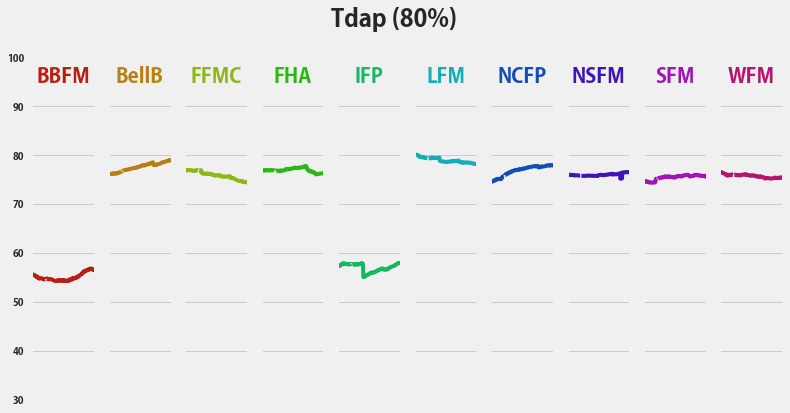

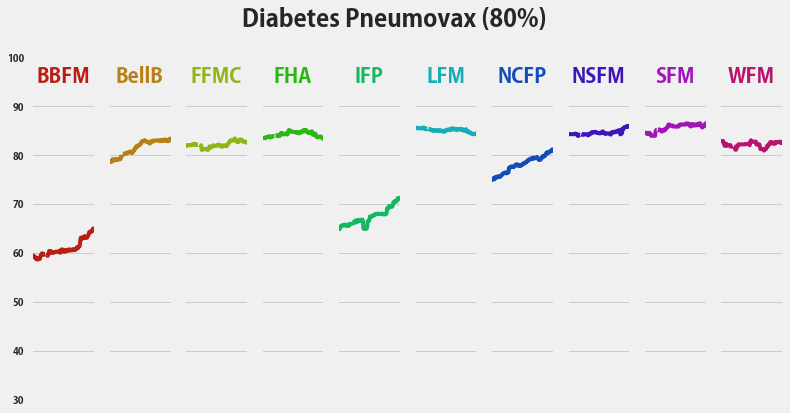

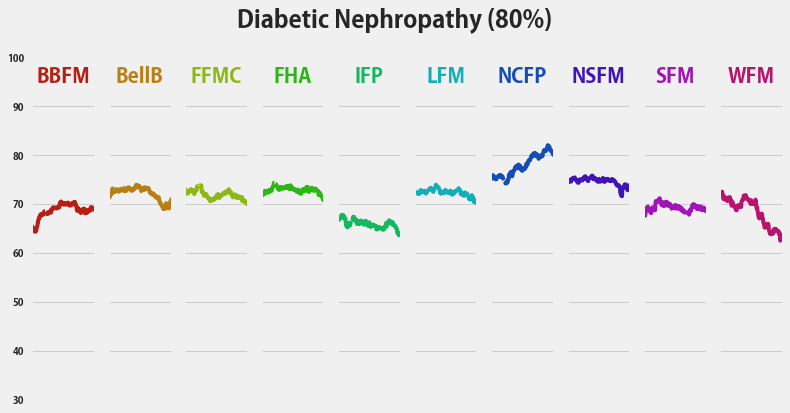

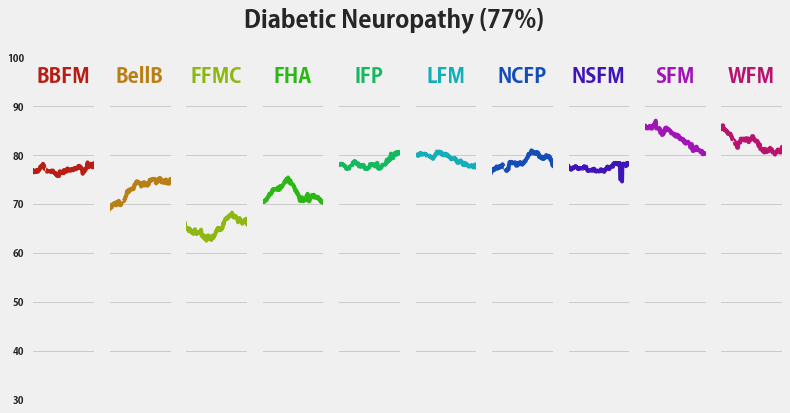

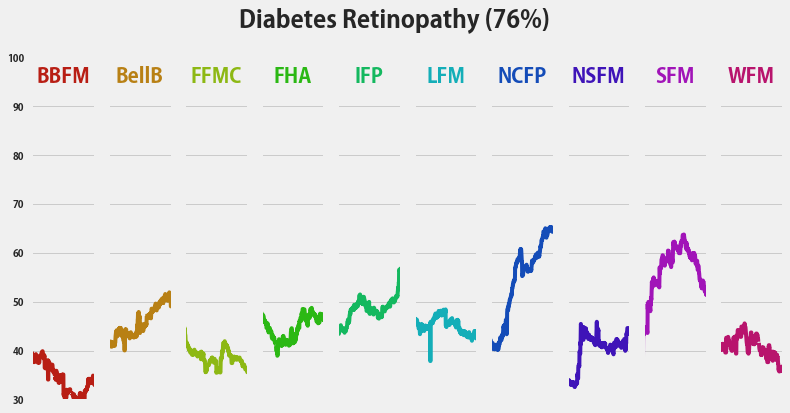

In [225]:
quality_graphs_by_clinics('COLORECTAL', "Colorectal Screening (76%)")
quality_graphs_by_clinics('PAP', "Pap Smears (85%)")
quality_graphs_by_clinics('MAMMO', "Mammography (78%)")
quality_graphs_by_clinics('TDAP', "Tdap (80%)")
quality_graphs_by_clinics('DM-PPSV', "Diabetes Pneumovax (80%)")
quality_graphs_by_clinics('DM-KIDNEY', "Diabetic Nephropathy (80%)")
quality_graphs_by_clinics('DM-FOOT', "Diabetic Neuropathy (77%)")
quality_graphs_by_clinics('DM-EYE', "Diabetes Retinopathy (76%)", '2017-01-01', '2018-02-28')